In [2]:
# IMPORT
# Standard libray
import sys, os
from importlib import reload
sys.path.append("..")

# Common library
from tqdm import tqdm
import numpy as np
import scipy
from pylab import *
import scipy.interpolate

# ROOT>....
import ROOT
# Make global style changes
ROOT.gStyle.SetOptStat(0) # Disable the statistics box
ROOT.gStyle.SetTextFont(42)
# ROOT.gStyle.SetOptFit(1111)
import atlasplots as aplt
aplt.set_atlas_style()
ROOT.gStyle.SetTitleXOffset(1)
ROOT.gStyle.SetTitleYOffset(1.8)

# Custom helper functions
import muhelper.helper_basic as hp
import helper_tofpet as hptof

# ROOT.gStyle.SetPalette(len(hptof.mpl_colors), hptof.mpl_colors32)
ROOT.gStyle.SetPalette(ROOT.kViridis)
# colors=[int(c) for c in hptof.mpl_colors ]
colors=hptof.mpl_colors_cls()

Applying ATLAS style settings


In [33]:
working_dir_funcgen = "/mnt/sda2/tofpet_data/function_gen/data/"

In [10]:
def get_dt(times1, times2=None, use_which="nearest"):
    """
    calculate times2-times1

    use_which: "before","nearest","after"
    """

    if times2 is None:
        dt_after = np.diff(times1, append=np.inf)
        dt_before = -np.diff(times1, prepend=-np.inf)
    else:
        times2 = np.sort(times2)
        indeces = np.searchsorted(times2, times1)
        dt_after = np.concatenate((times2, [np.inf]))[indeces] - times1
        dt_before = np.concatenate(([-np.inf], times2))[indeces] - times1

    dt_after[np.isinf(dt_after)] = np.inf
    dt_before[np.isinf(dt_before)] = -np.inf

    if np.any(dt_after<0) or np.any(dt_before>0):
        print('In get_dt: ERROR 1. Wrong dt sign')

    if use_which=="nearest":
        use_before = dt_after>-dt_before

        dt = np.zeros_like(dt_after)
        dt[use_before] = dt_before[use_before]
        dt[~use_before] = dt_after[~use_before]
    elif use_which=="before":
        dt = dt_before
    elif use_which=="after":
        dt = dt_after        

    ## revert the meaning of dt here
    return dt

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


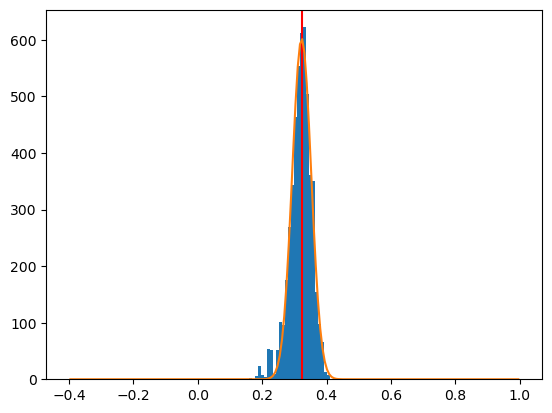

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


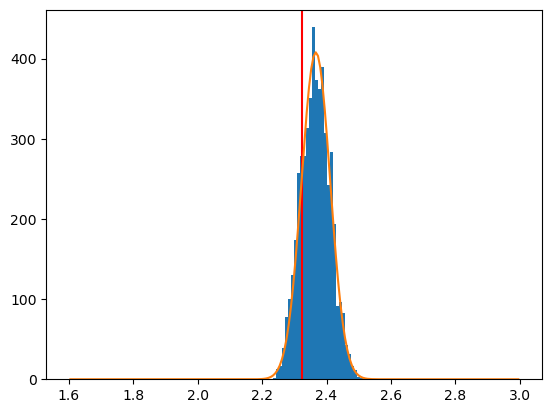

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10002


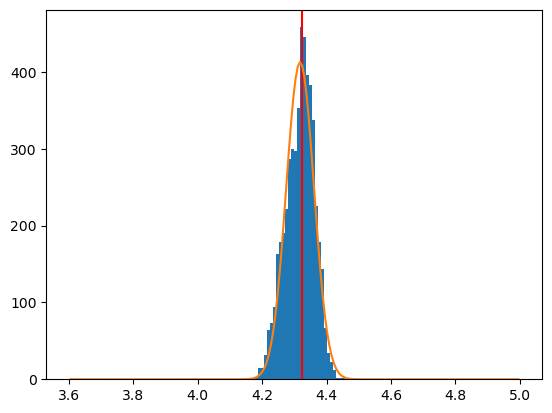

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


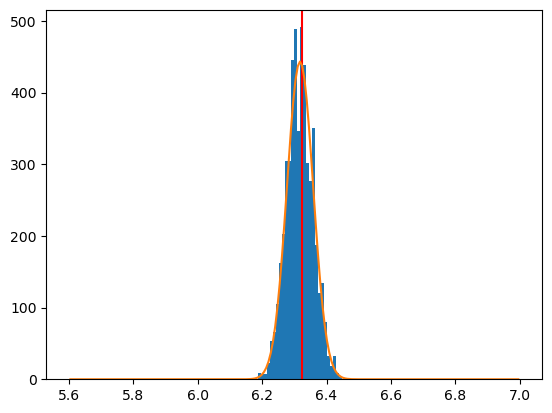

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


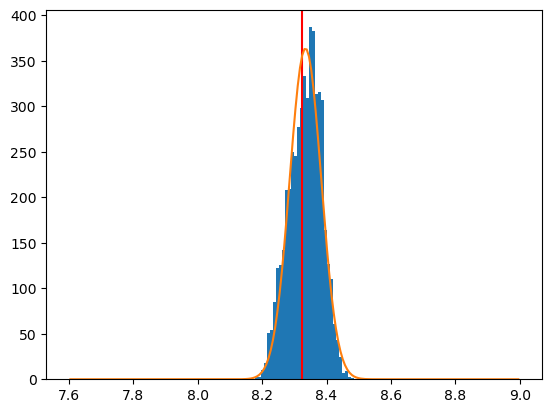

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


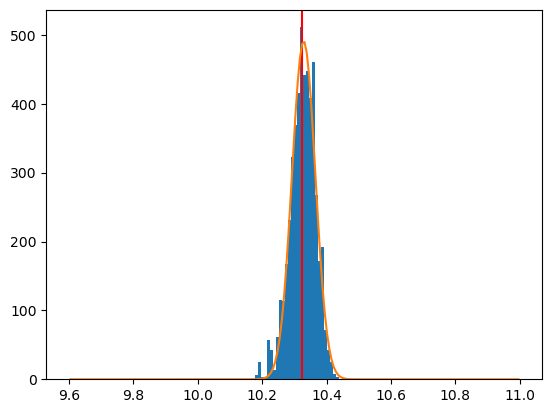

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


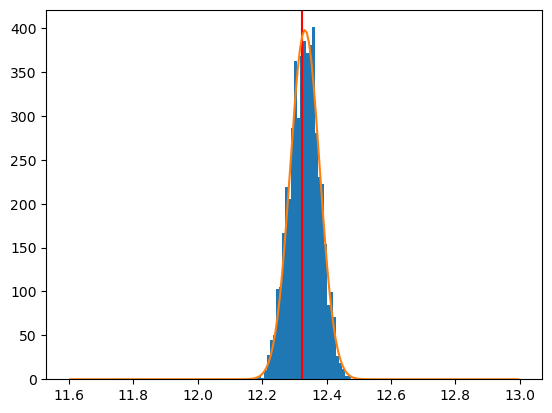

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


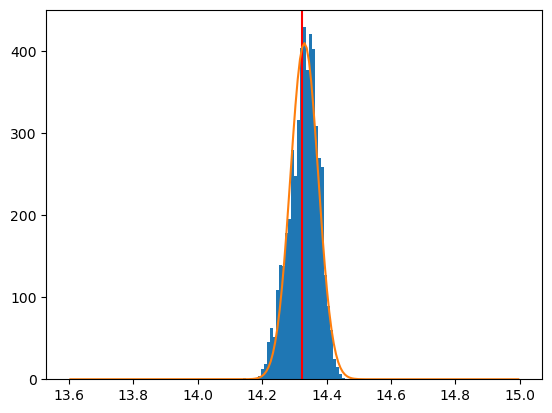

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


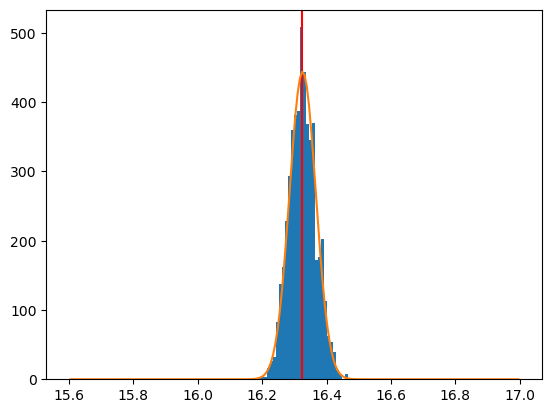

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


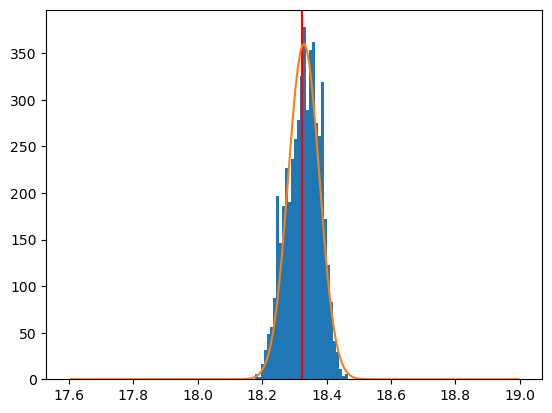

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


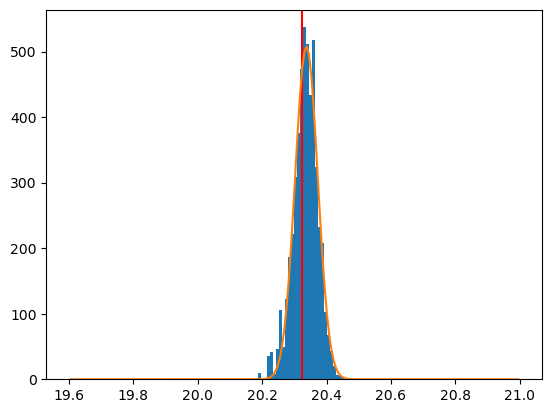

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


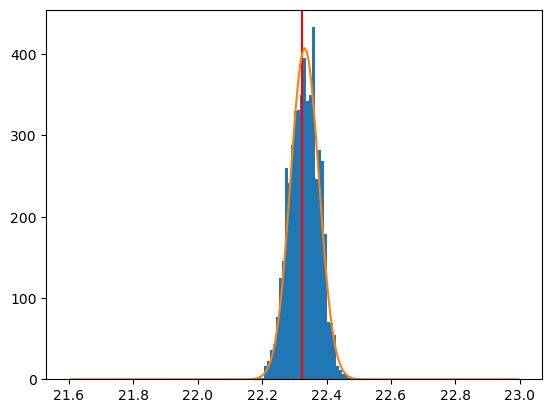

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


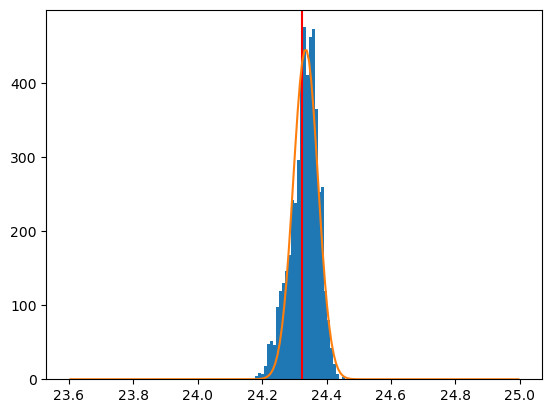

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


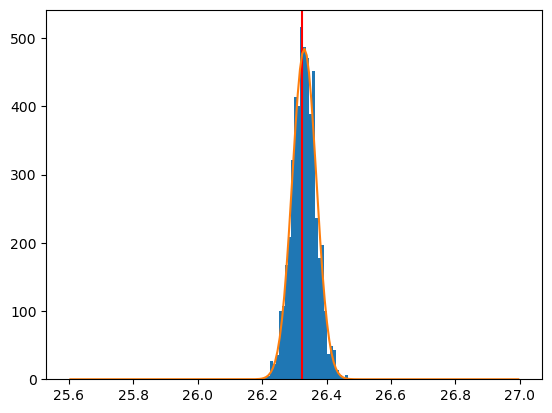

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


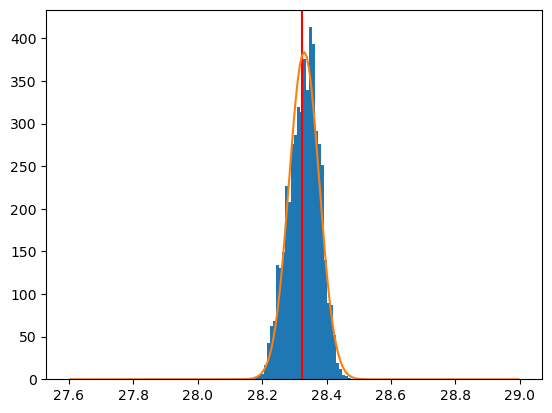

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


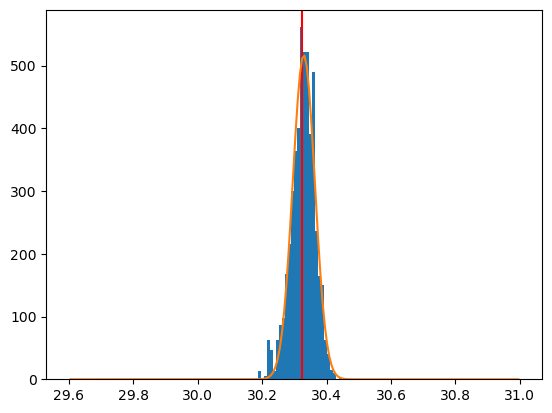

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


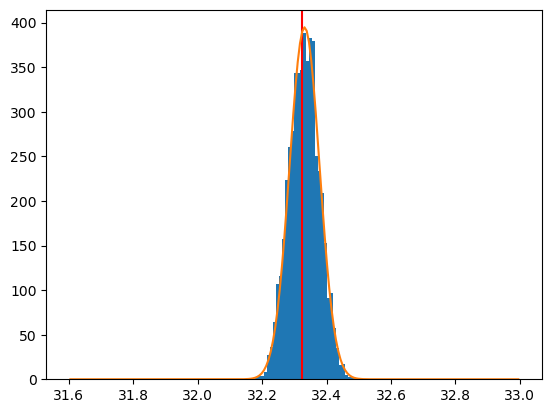

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


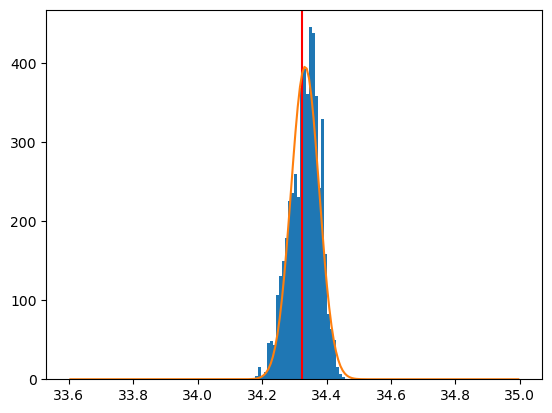

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


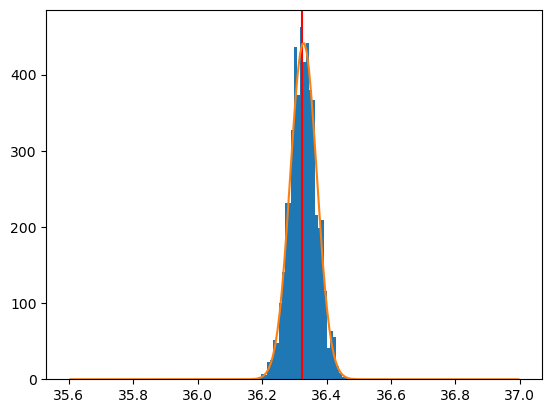

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


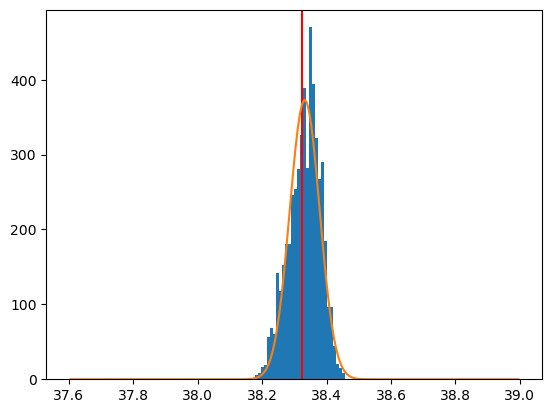

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


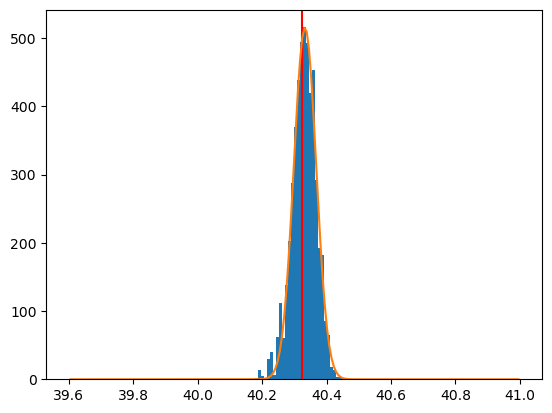

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


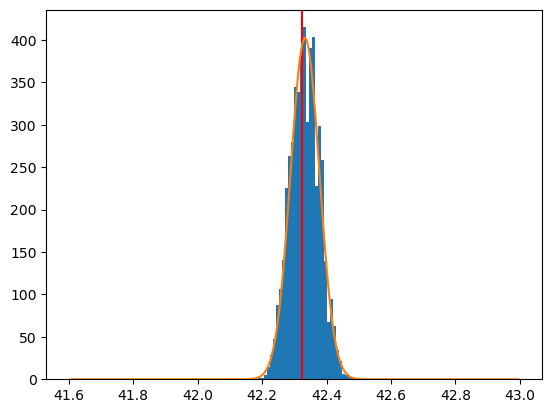

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


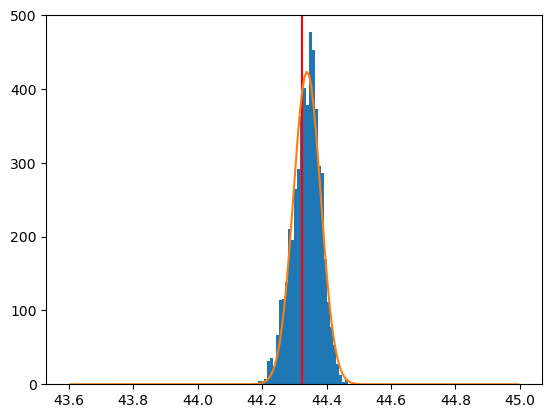

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


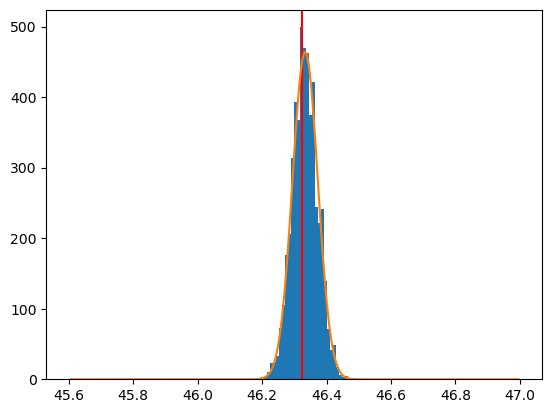

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


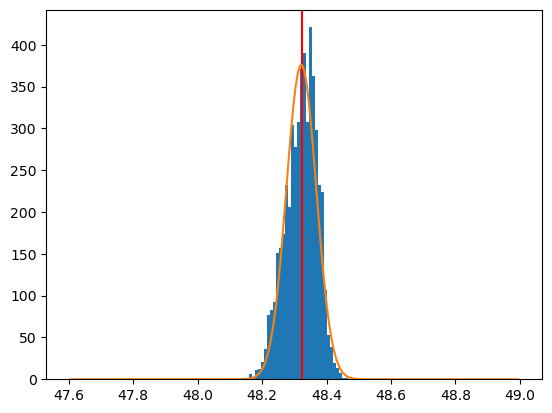

Tree name: data
Branches: ['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']
Entries: 10000


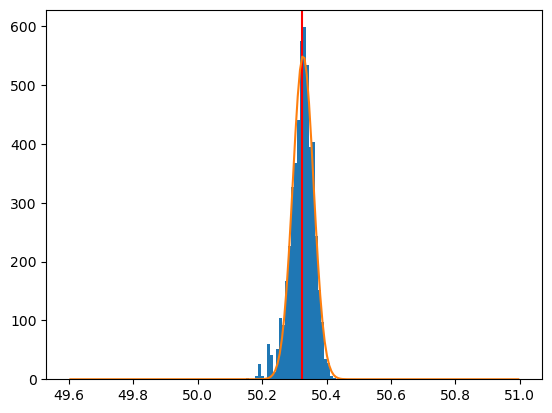

In [51]:
list_t =[2*x for x in range(26)]
means = []
stdev_means = []

for t in list_t:
    filename = working_dir_funcgen+"time_diff_"+str(t)+"ns_delay_single.root"
    tfile = ROOT.TFile.Open(filename)

    tree_name = tfile.GetListOfKeys()[0].GetName()
    Tree = tfile.Get(tree_name)

    branches = [Tree.GetListOfBranches()[i].GetName() for i in range(len(Tree.GetListOfBranches()))]
    entries = Tree.GetEntries()

    print("Tree name:", tree_name)
    print("Branches:", branches)
    print("Entries:", entries)



    # Use dataframe to quickly get things into numpy
    df = ROOT.RDataFrame(tree_name, filename)
    # df = df.Define('dt', '0.5*(time1-time2)')

    # cut_energy = "hit_nrg1>20 && hit_nrg2>20"
    # data = df.Filter(cut_energy).AsNumpy()
    ch1=329
    ch2=358

    data_ch1 = df.Filter(f"channelID=={ch1}").AsNumpy(["time"])
    data_ch2 = df.Filter(f"channelID=={ch2}").AsNumpy(["time"])
    dt = get_dt(data_ch1["time"], data_ch2["time"])*0.001
    
    plt.figure()
    data = hist(dt, bins=150, range=(-0.4+t,t+1))
    axvline(0.3227945568554061+t, color="r")
    popt, pcov, info, f = hp.fit_hist("Gauss",data)
    plt.show()
    means.append(popt[1])
    stdev_means.append(popt[2])
    
    tfile.Close()

In [56]:
mean_dts = []
uncert_dts = []

for m in range(len(means)):
    mean_dts.append(means[m]-means[0])
    uncert_dts.append(np.sqrt(stdev_means[m]**2 + stdev_means[0]**2))

print(mean_dts)
print(uncert_dts)

[0.0, 2.0439582881790592, 3.9950807184281327, 5.994895156363464, 8.011699435900775, 10.006125558762157, 12.010129367708458, 14.008246699659104, 16.003010195175545, 18.006531941386978, 20.014691239676424, 22.00944327435156, 24.012346791679242, 26.008133029616275, 28.007631049378464, 30.00650857045941, 32.00892683250154, 34.010613141735845, 36.005738295709705, 38.009406045656895, 40.01021206009551, 42.01028404775033, 44.016630282322495, 46.01077003354721, 47.99884045629326, 50.004505368113634]
[0.04171082529206339, 0.05341833492320498, 0.05209318264727646, 0.05029240738581862, 0.05710183061294511, 0.04676949450355497, 0.05450265302968456, 0.05225786948534298, 0.05035628937125616, 0.056460257487450115, 0.045971045927649015, 0.052997253757982234, 0.04833755229836738, 0.0477075864040972, 0.055331308099181194, 0.04531944946123163, 0.05513578225426752, 0.05266629229582346, 0.0506269105733641, 0.054964857810384585, 0.04561824532088591, 0.053603019664023234, 0.05157722470508191, 0.0491685639012

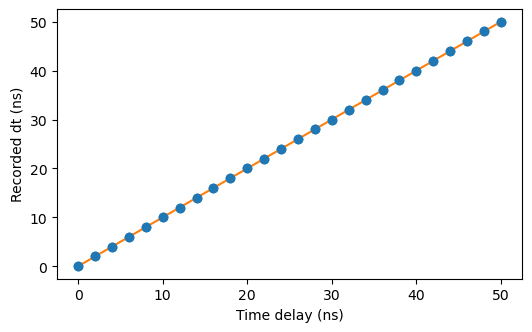

0.999974740913726 0.009260626404987704 0.9999998289016573


In [95]:
plt.figure(figsize=(6,3.5))
plt.scatter(list_t,mean_dts)
plt.errorbar(list_t,mean_dts,yerr=uncert_dts,fmt="o")
slope,intercept,rvalue,pvalue,stderr= scipy.stats.linregress(list_t,mean_dts)
predicted = slope*np.array(list_t) + intercept
plt.plot(list_t,predicted)
xlabel("Time delay (ns)")
ylabel("Recorded dt (ns)")
plt.savefig('timing_plot1.png')
plt.show()
print(slope,intercept,rvalue)
